<a href="https://colab.research.google.com/github/RasaRaj/ANN/blob/main/Base_Line_GoogleNet%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

2.12.0


In [25]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Final_datateset_for_Image.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Final_datateset_for_Image.zip')
f.keys()
!unzip Final_datateset_for_Image.zip

Streaming output truncated to the last 5000 lines.
  inflating: Final datateset for Image/validation/happy/15767.jpg  
  inflating: Final datateset for Image/validation/happy/15791.jpg  
  inflating: Final datateset for Image/validation/happy/15843.jpg  
  inflating: Final datateset for Image/validation/happy/15854.jpg  
  inflating: Final datateset for Image/validation/happy/15885.jpg  
  inflating: Final datateset for Image/validation/happy/15910.jpg  
  inflating: Final datateset for Image/validation/happy/15966.jpg  
  inflating: Final datateset for Image/validation/happy/15976.jpg  
  inflating: Final datateset for Image/validation/happy/15983.jpg  
  inflating: Final datateset for Image/validation/happy/16037.jpg  
  inflating: Final datateset for Image/validation/happy/16042.jpg  
  inflating: Final datateset for Image/validation/happy/16064.jpg  
  inflating: Final datateset for Image/validation/happy/16076.jpg  
  inflating: Final datateset for Image/validation/happy/16081.jpg

In [26]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers.serialization import activation
import numpy as np
     

In [27]:
train_dir = '/content/Final datateset for Image/train'
validation_dir = '/content/Final datateset for Image/validation'

In [28]:
# preprocessing

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=50,
                                                    class_mode ='categorical',
                                                    subset='training')

Found 17514 images belonging to 13 classes.


In [29]:
test_generator = train_datagen.flow_from_directory(validation_dir,
                                                   target_size=(224,224),
                                                   batch_size=50,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2939 images belonging to 13 classes.


In [30]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from glob import glob

In [34]:
# Define the input shape of the model
input_shape = (224, 224, 3)

# Load the pre-trained InceptionV3 model without the top layers
google_net = InceptionV3(
    include_top=False,
    weights= None,
    input_shape=input_shape
)

# Display the output shape of the model
google_net.output

<KerasTensor: shape=(None, 5, 5, 2048) dtype=float32 (created by layer 'mixed10')>

In [35]:
for layer in google_net.layers:
  layer.trainable = False

In [36]:
x=Flatten()(google_net.output)
prediction=Dense(13, activation= 'softmax')(x)
model=Model(inputs=google_net.input, outputs=prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history=model.fit(train_generator,epochs=25)

Epoch 1/25
351/351 [==============================] - 193s 538ms/step - loss: 2.0408 - accuracy: 0.2358
Epoch 2/25
351/351 [==============================] - 188s 535ms/step - loss: 1.9886 - accuracy: 0.2674
Epoch 3/25
351/351 [==============================] - 187s 534ms/step - loss: 1.9136 - accuracy: 0.2847
Epoch 4/25
351/351 [==============================] - 191s 545ms/step - loss: 1.8593 - accuracy: 0.3091
Epoch 5/25
351/351 [==============================] - 191s 543ms/step - loss: 1.8812 - accuracy: 0.3032
Epoch 6/25
351/351 [==============================] - 193s 548ms/step - loss: 1.8522 - accuracy: 0.3163
Epoch 7/25
351/351 [==============================] - 190s 541ms/step - loss: 1.8293 - accuracy: 0.3185
Epoch 8/25
351/351 [==============================] - 189s 539ms/step - loss: 1.8210 - accuracy: 0.3260
Epoch 9/25
351/351 [==============================] - 186s 531ms/step - loss: 1.8041 - accuracy: 0.3332
Epoch 10/25
351/351 [==============================] - 187s 534m

Accuracy:  0.382722407579422


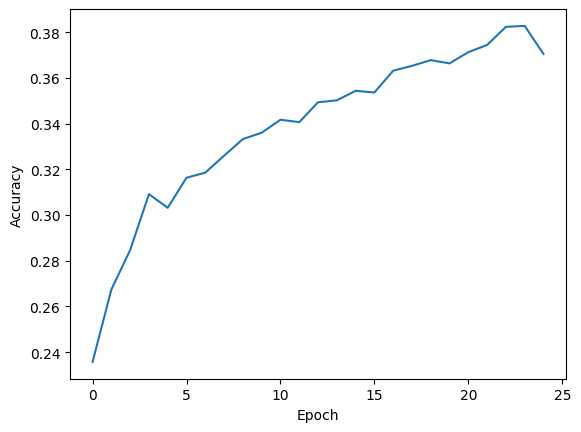

In [39]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
print("Accuracy: ",max(history.history['accuracy']))
plt.show()

In [40]:
#Testing

from tensorflow.keras.preprocessing import image
import numpy as np

img_pred=image.load_img("/content/Final datateset for Image/validation/happy/333.jpg",target_size=(224,224))
img_pred = np.expand_dims(img_pred, axis=0)
result = model.predict(img_pred)

print(result)

1/1 [==============================] - 1s 1s/step
[[2.6565890e-03 5.2119996e-03 4.4068892e-02 3.8661089e-02 5.1944794e-12
  1.0100005e-08 8.5733509e-01 8.9674659e-09 2.0258724e-10 4.8210113e-14
  9.0590978e-16 1.7345933e-02 3.4720413e-02]]


In [41]:

if rslt[0][0]>rslt[0][1]:
  prediction = "sad"

else:
  prediction = "happy"


print(prediction)

happy
